In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
import keras.backend as kb
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-type' , 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
automobile = pd.read_csv('imports-85.data', names=cols)
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
automobile.shape

(205, 26)

In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
for col in automobile:
    print(automobile[col].unique())

[ 3  1  2  0 -1 -2]
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 

In [7]:
automobile.replace('?', np.nan, inplace=True)
automobile.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
automobile['normalized-losses'] = pd.to_numeric(automobile['normalized-losses'], errors='coerce')
automobile['normalized-losses'].fillna(automobile['normalized-losses'].mean(), inplace=True)

In [9]:
automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'], errors='coerce')
automobile['peak-rpm'].fillna(automobile['peak-rpm'].mean(), inplace=True)

In [10]:
automobile['horsepower'] = pd.to_numeric(automobile['horsepower'], errors='coerce')
automobile['horsepower'].fillna(automobile['horsepower'].mean(), inplace=True)

In [11]:
automobile['price'] = pd.to_numeric(automobile['price'], errors='coerce')
automobile['price'].fillna(automobile['price'].mean(), inplace=True)

In [12]:
automobile['bore'] = pd.to_numeric(automobile['bore'], errors='coerce')
automobile['bore'].fillna(automobile['bore'].mean(), inplace=True)

In [13]:
automobile['stroke'] = pd.to_numeric(automobile['stroke'], errors='coerce')
automobile['stroke'].fillna(automobile['stroke'].mean(), inplace=True)

In [14]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [15]:
automobile['num-of-doors'] = automobile['num-of-doors'].map({'two': 2, 'four': 4})

In [16]:
automobile['num-of-doors'] = pd.to_numeric(automobile['num-of-doors'], errors='coerce')
automobile['num-of-doors'].fillna(2.0, inplace=True)

In [17]:
categorical = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location',      
                'engine-type', 'num-of-cylinders', 'fuel-system']

In [18]:
le=LabelEncoder()
for category in categorical:
    automobile[category] = le.fit_transform(automobile[category])

In [19]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2.0,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,2.0,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,2.0,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,4.0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,4.0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [20]:
y=automobile['price']
x=automobile.drop(['price'],axis=1)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

#model = keras.Sequential([
    #keras.layers.Dense(56, activation=tf.nn.relu),
    #keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam(0.000009)
model.compile(loss='mean_squared_error',optimizer=optimizer)
model.fit(x,y,epochs=500)

In [22]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=25, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3328      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
____________________________________________________

In [23]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [24]:
>>> history = model.fit(x_train, y_train, epochs=2500, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/2500
3/3 [==============================] - 0s 86ms/step - loss: 232909424.0000 - mse: 232909424.0000 - mae: 13113.6680 - val_loss: 242486512.0000 - val_mse: 242486512.0000 - val_mae: 13671.2764
Epoch 2/2500
3/3 [==============================] - 0s 8ms/step - loss: 230663120.0000 - mse: 230663120.0000 - mae: 13029.7344 - val_loss: 240572752.0000 - val_mse: 240572752.0000 - val_mae: 13603.1357
Epoch 3/2500
3/3 [==============================] - 0s 8ms/step - loss: 228528128.0000 - mse: 228528128.0000 - mae: 12951.3848 - val_loss: 237813552.0000 - val_mse: 237813552.0000 - val_mae: 13506.2803
Epoch 4/2500
3/3 [==============================] - 0s 9ms/step - loss: 225926432.0000 - mse: 225926432.0000 - mae: 12856.8232 - val_loss: 234744192.0000 - val_mse: 234744192.0000 - val_mae: 13393.2236
Epoch 5/2500
3/3 [==============================] - 0s 9ms/step - loss: 222873648.0000 - mse: 222873648.0000 - mae: 12738.6484 - val_loss: 230967872.0000 - val_mse: 230967872.0000 - val_mae: 

3/3 [==============================] - 0s 8ms/step - loss: 46573356.0000 - mse: 46573356.0000 - mae: 5167.0176 - val_loss: 43595248.0000 - val_mse: 43595248.0000 - val_mae: 4989.9512
Epoch 43/2500
3/3 [==============================] - 0s 9ms/step - loss: 46382260.0000 - mse: 46382268.0000 - mae: 5171.5498 - val_loss: 43317320.0000 - val_mse: 43317320.0000 - val_mae: 4991.4634
Epoch 44/2500
3/3 [==============================] - 0s 8ms/step - loss: 46221740.0000 - mse: 46221740.0000 - mae: 5167.5376 - val_loss: 43013324.0000 - val_mse: 43013324.0000 - val_mae: 4969.5039
Epoch 45/2500
3/3 [==============================] - 0s 10ms/step - loss: 45973264.0000 - mse: 45973264.0000 - mae: 5160.2012 - val_loss: 42737512.0000 - val_mse: 42737512.0000 - val_mae: 4976.8789
Epoch 46/2500
3/3 [==============================] - 0s 10ms/step - loss: 45725876.0000 - mse: 45725876.0000 - mae: 5156.4609 - val_loss: 42413760.0000 - val_mse: 42413760.0000 - val_mae: 4950.5762
Epoch 47/2500
3/3 [========

Epoch 84/2500
3/3 [==============================] - 0s 8ms/step - loss: 32829572.0000 - mse: 32829572.0000 - mae: 4282.6929 - val_loss: 25432082.0000 - val_mse: 25432082.0000 - val_mae: 3988.6516
Epoch 85/2500
3/3 [==============================] - 0s 7ms/step - loss: 32272682.0000 - mse: 32272682.0000 - mae: 4243.8110 - val_loss: 24806500.0000 - val_mse: 24806500.0000 - val_mae: 3955.6240
Epoch 86/2500
3/3 [==============================] - 0s 8ms/step - loss: 31810396.0000 - mse: 31810396.0000 - mae: 4213.7622 - val_loss: 24114550.0000 - val_mse: 24114550.0000 - val_mae: 3900.8523
Epoch 87/2500
3/3 [==============================] - 0s 8ms/step - loss: 31272486.0000 - mse: 31272486.0000 - mae: 4154.7607 - val_loss: 23418100.0000 - val_mse: 23418100.0000 - val_mae: 3832.4119
Epoch 88/2500
3/3 [==============================] - 0s 8ms/step - loss: 30886766.0000 - mse: 30886768.0000 - mae: 4082.5554 - val_loss: 22740128.0000 - val_mse: 22740128.0000 - val_mae: 3756.5103
Epoch 89/2500
3

3/3 [==============================] - 0s 9ms/step - loss: 20350246.0000 - mse: 20350250.0000 - mae: 2929.7739 - val_loss: 8907339.0000 - val_mse: 8907339.0000 - val_mae: 2247.8386
Epoch 126/2500
3/3 [==============================] - 0s 10ms/step - loss: 20215854.0000 - mse: 20215854.0000 - mae: 2921.7134 - val_loss: 9206160.0000 - val_mse: 9206160.0000 - val_mae: 2298.9246
Epoch 127/2500
3/3 [==============================] - 0s 9ms/step - loss: 20546090.0000 - mse: 20546090.0000 - mae: 3009.5601 - val_loss: 9845179.0000 - val_mse: 9845179.0000 - val_mae: 2413.7368
Epoch 128/2500
3/3 [==============================] - 0s 9ms/step - loss: 20194328.0000 - mse: 20194328.0000 - mae: 2970.3877 - val_loss: 8808807.0000 - val_mse: 8808807.0000 - val_mae: 2230.8230
Epoch 129/2500
3/3 [==============================] - 0s 8ms/step - loss: 20217380.0000 - mse: 20217382.0000 - mae: 2896.7344 - val_loss: 8520610.0000 - val_mse: 8520610.0000 - val_mae: 2175.2776
Epoch 130/2500
3/3 [==============

Epoch 167/2500
3/3 [==============================] - 0s 6ms/step - loss: 18101638.0000 - mse: 18101638.0000 - mae: 2742.5793 - val_loss: 8150162.5000 - val_mse: 8150162.5000 - val_mae: 2107.0562
Epoch 168/2500
3/3 [==============================] - 0s 6ms/step - loss: 18162788.0000 - mse: 18162788.0000 - mae: 2708.6475 - val_loss: 7922823.0000 - val_mse: 7922823.0000 - val_mae: 2053.8401
Epoch 169/2500
3/3 [==============================] - 0s 6ms/step - loss: 17914538.0000 - mse: 17914538.0000 - mae: 2713.0425 - val_loss: 8771041.0000 - val_mse: 8771041.0000 - val_mae: 2257.8320
Epoch 170/2500
3/3 [==============================] - 0s 6ms/step - loss: 17861840.0000 - mse: 17861840.0000 - mae: 2760.1841 - val_loss: 8924549.0000 - val_mse: 8924549.0000 - val_mae: 2294.9219
Epoch 171/2500
3/3 [==============================] - 0s 7ms/step - loss: 17839482.0000 - mse: 17839482.0000 - mae: 2766.9558 - val_loss: 8666800.0000 - val_mse: 8666800.0000 - val_mae: 2236.8386
Epoch 172/2500
3/3 [

Epoch 209/2500
3/3 [==============================] - 0s 6ms/step - loss: 16195144.0000 - mse: 16195144.0000 - mae: 2555.7078 - val_loss: 8468713.0000 - val_mse: 8468713.0000 - val_mae: 2153.8489
Epoch 210/2500
3/3 [==============================] - 0s 7ms/step - loss: 15699793.0000 - mse: 15699793.0000 - mae: 2557.2886 - val_loss: 8697805.0000 - val_mse: 8697805.0000 - val_mae: 2207.2119
Epoch 211/2500
3/3 [==============================] - 0s 6ms/step - loss: 16038416.0000 - mse: 16038416.0000 - mae: 2636.7771 - val_loss: 9089690.0000 - val_mse: 9089690.0000 - val_mae: 2299.9402
Epoch 212/2500
3/3 [==============================] - 0s 6ms/step - loss: 15741385.0000 - mse: 15741385.0000 - mae: 2559.8936 - val_loss: 7792300.5000 - val_mse: 7792300.5000 - val_mae: 1977.0973
Epoch 213/2500
3/3 [==============================] - 0s 5ms/step - loss: 15885063.0000 - mse: 15885062.0000 - mae: 2505.6470 - val_loss: 7777492.5000 - val_mse: 7777492.5000 - val_mae: 1972.9395
Epoch 214/2500
3/3 [

Epoch 251/2500
3/3 [==============================] - 0s 6ms/step - loss: 13927061.0000 - mse: 13927061.0000 - mae: 2465.1316 - val_loss: 8774182.0000 - val_mse: 8774182.0000 - val_mae: 2107.9492
Epoch 252/2500
3/3 [==============================] - 0s 5ms/step - loss: 13588646.0000 - mse: 13588646.0000 - mae: 2448.3286 - val_loss: 9957169.0000 - val_mse: 9957169.0000 - val_mae: 2370.3088
Epoch 253/2500
3/3 [==============================] - 0s 7ms/step - loss: 13577345.0000 - mse: 13577345.0000 - mae: 2486.8689 - val_loss: 9581901.0000 - val_mse: 9581901.0000 - val_mae: 2283.6748
Epoch 254/2500
3/3 [==============================] - 0s 6ms/step - loss: 13409897.0000 - mse: 13409897.0000 - mae: 2455.7351 - val_loss: 8659025.0000 - val_mse: 8659025.0000 - val_mae: 2084.3318
Epoch 255/2500
3/3 [==============================] - 0s 7ms/step - loss: 13380960.0000 - mse: 13380960.0000 - mae: 2399.8342 - val_loss: 8428564.0000 - val_mse: 8428564.0000 - val_mae: 2059.9253
Epoch 256/2500
3/3 [

Epoch 293/2500
3/3 [==============================] - 0s 6ms/step - loss: 12036942.0000 - mse: 12036942.0000 - mae: 2416.5830 - val_loss: 12295805.0000 - val_mse: 12295805.0000 - val_mae: 2680.4314
Epoch 294/2500
3/3 [==============================] - 0s 6ms/step - loss: 11836819.0000 - mse: 11836819.0000 - mae: 2411.5808 - val_loss: 10571222.0000 - val_mse: 10571222.0000 - val_mae: 2380.0688
Epoch 295/2500
3/3 [==============================] - 0s 6ms/step - loss: 12274598.0000 - mse: 12274598.0000 - mae: 2369.7927 - val_loss: 9405000.0000 - val_mse: 9405000.0000 - val_mae: 2169.3457
Epoch 296/2500
3/3 [==============================] - 0s 6ms/step - loss: 11830718.0000 - mse: 11830717.0000 - mae: 2293.2456 - val_loss: 10402088.0000 - val_mse: 10402088.0000 - val_mae: 2366.5820
Epoch 297/2500
3/3 [==============================] - 0s 6ms/step - loss: 11248132.0000 - mse: 11248132.0000 - mae: 2316.2104 - val_loss: 12709988.0000 - val_mse: 12709988.0000 - val_mae: 2754.1440
Epoch 298/25

3/3 [==============================] - 0s 7ms/step - loss: 10830182.0000 - mse: 10830182.0000 - mae: 2291.8523 - val_loss: 12272721.0000 - val_mse: 12272721.0000 - val_mae: 2593.8652
Epoch 335/2500
3/3 [==============================] - 0s 6ms/step - loss: 10614675.0000 - mse: 10614675.0000 - mae: 2274.2844 - val_loss: 11345456.0000 - val_mse: 11345456.0000 - val_mae: 2418.5544
Epoch 336/2500
3/3 [==============================] - 0s 6ms/step - loss: 10628373.0000 - mse: 10628373.0000 - mae: 2265.5913 - val_loss: 11886756.0000 - val_mse: 11886756.0000 - val_mae: 2529.9067
Epoch 337/2500
3/3 [==============================] - 0s 7ms/step - loss: 10804044.0000 - mse: 10804044.0000 - mae: 2304.1545 - val_loss: 12617862.0000 - val_mse: 12617862.0000 - val_mae: 2650.6089
Epoch 338/2500
3/3 [==============================] - 0s 6ms/step - loss: 10792337.0000 - mse: 10792337.0000 - mae: 2310.0569 - val_loss: 11591702.0000 - val_mse: 11591702.0000 - val_mae: 2458.8206
Epoch 339/2500
3/3 [=====

3/3 [==============================] - 0s 13ms/step - loss: 10369116.0000 - mse: 10369116.0000 - mae: 2281.4685 - val_loss: 12628689.0000 - val_mse: 12628689.0000 - val_mae: 2605.3372
Epoch 376/2500
3/3 [==============================] - 0s 8ms/step - loss: 10292874.0000 - mse: 10292874.0000 - mae: 2257.1929 - val_loss: 11969470.0000 - val_mse: 11969470.0000 - val_mae: 2479.4180
Epoch 377/2500
3/3 [==============================] - 0s 8ms/step - loss: 10689082.0000 - mse: 10689082.0000 - mae: 2280.9790 - val_loss: 13106839.0000 - val_mse: 13106839.0000 - val_mae: 2679.1794
Epoch 378/2500
3/3 [==============================] - 0s 8ms/step - loss: 10356120.0000 - mse: 10356120.0000 - mae: 2275.7788 - val_loss: 12367726.0000 - val_mse: 12367726.0000 - val_mae: 2547.9509
Epoch 379/2500
3/3 [==============================] - 0s 8ms/step - loss: 10316860.0000 - mse: 10316860.0000 - mae: 2250.1008 - val_loss: 12767051.0000 - val_mse: 12767051.0000 - val_mae: 2631.1917
Epoch 380/2500
3/3 [====

3/3 [==============================] - 0s 10ms/step - loss: 9974389.0000 - mse: 9974389.0000 - mae: 2215.8845 - val_loss: 12931184.0000 - val_mse: 12931184.0000 - val_mae: 2651.8723
Epoch 417/2500
3/3 [==============================] - 0s 9ms/step - loss: 10003282.0000 - mse: 10003282.0000 - mae: 2232.7329 - val_loss: 13091361.0000 - val_mse: 13091361.0000 - val_mae: 2673.1794
Epoch 418/2500
3/3 [==============================] - 0s 10ms/step - loss: 9984890.0000 - mse: 9984890.0000 - mae: 2246.0046 - val_loss: 12423483.0000 - val_mse: 12423483.0000 - val_mae: 2558.2305
Epoch 419/2500
3/3 [==============================] - 0s 10ms/step - loss: 10017171.0000 - mse: 10017171.0000 - mae: 2228.1282 - val_loss: 12701227.0000 - val_mse: 12701227.0000 - val_mae: 2604.1721
Epoch 420/2500
3/3 [==============================] - 0s 9ms/step - loss: 9976285.0000 - mse: 9976285.0000 - mae: 2228.5884 - val_loss: 12485055.0000 - val_mse: 12485055.0000 - val_mae: 2573.3259
Epoch 421/2500
3/3 [========

Epoch 458/2500
3/3 [==============================] - 0s 6ms/step - loss: 10106955.0000 - mse: 10106955.0000 - mae: 2258.5471 - val_loss: 13772926.0000 - val_mse: 13772926.0000 - val_mae: 2756.0569
Epoch 459/2500
3/3 [==============================] - 0s 6ms/step - loss: 10281712.0000 - mse: 10281712.0000 - mae: 2293.3945 - val_loss: 12374567.0000 - val_mse: 12374567.0000 - val_mae: 2539.5281
Epoch 460/2500
3/3 [==============================] - 0s 6ms/step - loss: 9755350.0000 - mse: 9755350.0000 - mae: 2199.4963 - val_loss: 13425484.0000 - val_mse: 13425484.0000 - val_mae: 2698.0842
Epoch 461/2500
3/3 [==============================] - 0s 6ms/step - loss: 9820937.0000 - mse: 9820937.0000 - mae: 2223.7271 - val_loss: 14096514.0000 - val_mse: 14096514.0000 - val_mae: 2799.9214
Epoch 462/2500
3/3 [==============================] - 0s 7ms/step - loss: 9956529.0000 - mse: 9956529.0000 - mae: 2216.7603 - val_loss: 12679511.0000 - val_mse: 12679511.0000 - val_mae: 2583.4783
Epoch 463/2500
3

Epoch 500/2500
3/3 [==============================] - 0s 8ms/step - loss: 9974904.0000 - mse: 9974904.0000 - mae: 2235.9268 - val_loss: 11923432.0000 - val_mse: 11923432.0000 - val_mae: 2463.0239
Epoch 501/2500
3/3 [==============================] - 0s 7ms/step - loss: 9855730.0000 - mse: 9855730.0000 - mae: 2199.0244 - val_loss: 13429623.0000 - val_mse: 13429623.0000 - val_mae: 2703.4224
Epoch 502/2500
3/3 [==============================] - 0s 7ms/step - loss: 10278361.0000 - mse: 10278361.0000 - mae: 2269.8760 - val_loss: 15709680.0000 - val_mse: 15709680.0000 - val_mae: 3017.3826
Epoch 503/2500
3/3 [==============================] - 0s 7ms/step - loss: 9979769.0000 - mse: 9979769.0000 - mae: 2233.2710 - val_loss: 12243512.0000 - val_mse: 12243512.0000 - val_mae: 2523.6013
Epoch 504/2500
3/3 [==============================] - 0s 8ms/step - loss: 10677838.0000 - mse: 10677838.0000 - mae: 2268.1941 - val_loss: 11912899.0000 - val_mse: 11912899.0000 - val_mae: 2464.1516
Epoch 505/2500
3

Epoch 542/2500
3/3 [==============================] - 0s 7ms/step - loss: 9550955.0000 - mse: 9550955.0000 - mae: 2171.2871 - val_loss: 13585931.0000 - val_mse: 13585931.0000 - val_mae: 2739.6304
Epoch 543/2500
3/3 [==============================] - 0s 7ms/step - loss: 9578567.0000 - mse: 9578567.0000 - mae: 2202.4434 - val_loss: 13891564.0000 - val_mse: 13891564.0000 - val_mae: 2777.4102
Epoch 544/2500
3/3 [==============================] - 0s 8ms/step - loss: 9708024.0000 - mse: 9708025.0000 - mae: 2205.9397 - val_loss: 12456951.0000 - val_mse: 12456951.0000 - val_mae: 2569.8262
Epoch 545/2500
3/3 [==============================] - 0s 8ms/step - loss: 9525532.0000 - mse: 9525533.0000 - mae: 2174.5261 - val_loss: 12929289.0000 - val_mse: 12929289.0000 - val_mae: 2624.7930
Epoch 546/2500
3/3 [==============================] - 0s 8ms/step - loss: 9615954.0000 - mse: 9615954.0000 - mae: 2200.4062 - val_loss: 13461355.0000 - val_mse: 13461355.0000 - val_mae: 2697.9260
Epoch 547/2500
3/3 [

Epoch 584/2500
3/3 [==============================] - 0s 6ms/step - loss: 9383799.0000 - mse: 9383799.0000 - mae: 2167.0408 - val_loss: 12570222.0000 - val_mse: 12570222.0000 - val_mae: 2594.4460
Epoch 585/2500
3/3 [==============================] - 0s 6ms/step - loss: 9400297.0000 - mse: 9400297.0000 - mae: 2174.2341 - val_loss: 12711535.0000 - val_mse: 12711535.0000 - val_mae: 2605.3423
Epoch 586/2500
3/3 [==============================] - 0s 6ms/step - loss: 9310453.0000 - mse: 9310453.0000 - mae: 2156.6243 - val_loss: 12560320.0000 - val_mse: 12560320.0000 - val_mae: 2578.6172
Epoch 587/2500
3/3 [==============================] - 0s 6ms/step - loss: 9362577.0000 - mse: 9362577.0000 - mae: 2154.7114 - val_loss: 12587419.0000 - val_mse: 12587419.0000 - val_mae: 2581.3474
Epoch 588/2500
3/3 [==============================] - 0s 8ms/step - loss: 9320177.0000 - mse: 9320177.0000 - mae: 2155.7146 - val_loss: 13164941.0000 - val_mse: 13164941.0000 - val_mae: 2651.1355
Epoch 589/2500
3/3 [

Epoch 626/2500
3/3 [==============================] - 0s 7ms/step - loss: 9538658.0000 - mse: 9538658.0000 - mae: 2172.5483 - val_loss: 12881332.0000 - val_mse: 12881332.0000 - val_mae: 2639.1692
Epoch 627/2500
3/3 [==============================] - 0s 6ms/step - loss: 9226235.0000 - mse: 9226235.0000 - mae: 2150.1394 - val_loss: 13023814.0000 - val_mse: 13023814.0000 - val_mae: 2650.6853
Epoch 628/2500
3/3 [==============================] - 0s 8ms/step - loss: 9279850.0000 - mse: 9279850.0000 - mae: 2154.7856 - val_loss: 13277729.0000 - val_mse: 13277729.0000 - val_mae: 2670.3545
Epoch 629/2500
3/3 [==============================] - 0s 6ms/step - loss: 9111390.0000 - mse: 9111390.0000 - mae: 2140.4941 - val_loss: 12222492.0000 - val_mse: 12222492.0000 - val_mae: 2529.4031
Epoch 630/2500
3/3 [==============================] - 0s 6ms/step - loss: 9533484.0000 - mse: 9533484.0000 - mae: 2152.8838 - val_loss: 11907216.0000 - val_mse: 11907216.0000 - val_mae: 2495.0549
Epoch 631/2500
3/3 [

Epoch 668/2500
3/3 [==============================] - 0s 6ms/step - loss: 9189820.0000 - mse: 9189820.0000 - mae: 2156.8447 - val_loss: 12614658.0000 - val_mse: 12614658.0000 - val_mae: 2601.2927
Epoch 669/2500
3/3 [==============================] - 0s 6ms/step - loss: 8965048.0000 - mse: 8965048.0000 - mae: 2117.6729 - val_loss: 12172268.0000 - val_mse: 12172268.0000 - val_mae: 2534.3960
Epoch 670/2500
3/3 [==============================] - 0s 6ms/step - loss: 9053764.0000 - mse: 9053764.0000 - mae: 2122.4910 - val_loss: 12162208.0000 - val_mse: 12162208.0000 - val_mae: 2530.9180
Epoch 671/2500
3/3 [==============================] - 0s 6ms/step - loss: 9091542.0000 - mse: 9091542.0000 - mae: 2134.7466 - val_loss: 13025030.0000 - val_mse: 13025030.0000 - val_mae: 2639.0815
Epoch 672/2500
3/3 [==============================] - 0s 6ms/step - loss: 9137443.0000 - mse: 9137443.0000 - mae: 2137.9976 - val_loss: 12402020.0000 - val_mse: 12402020.0000 - val_mae: 2563.6172
Epoch 673/2500
3/3 [

Epoch 710/2500
3/3 [==============================] - 0s 7ms/step - loss: 8824386.0000 - mse: 8824386.0000 - mae: 2101.3054 - val_loss: 11983920.0000 - val_mse: 11983920.0000 - val_mae: 2527.0125
Epoch 711/2500
3/3 [==============================] - 0s 7ms/step - loss: 8992188.0000 - mse: 8992188.0000 - mae: 2118.6880 - val_loss: 12130805.0000 - val_mse: 12130805.0000 - val_mae: 2549.1416
Epoch 712/2500
3/3 [==============================] - 0s 6ms/step - loss: 8871799.0000 - mse: 8871799.0000 - mae: 2100.0254 - val_loss: 11731262.0000 - val_mse: 11731262.0000 - val_mae: 2507.2109
Epoch 713/2500
3/3 [==============================] - 0s 6ms/step - loss: 8859250.0000 - mse: 8859250.0000 - mae: 2107.9978 - val_loss: 12524472.0000 - val_mse: 12524472.0000 - val_mae: 2606.0525
Epoch 714/2500
3/3 [==============================] - 0s 5ms/step - loss: 8958667.0000 - mse: 8958667.0000 - mae: 2110.7756 - val_loss: 12913100.0000 - val_mse: 12913100.0000 - val_mae: 2645.1709
Epoch 715/2500
3/3 [

Epoch 752/2500
3/3 [==============================] - 0s 6ms/step - loss: 8967109.0000 - mse: 8967109.0000 - mae: 2109.4500 - val_loss: 11322751.0000 - val_mse: 11322751.0000 - val_mae: 2444.5986
Epoch 753/2500
3/3 [==============================] - 0s 6ms/step - loss: 8682593.0000 - mse: 8682592.0000 - mae: 2076.6331 - val_loss: 12587243.0000 - val_mse: 12587243.0000 - val_mae: 2596.1841
Epoch 754/2500
3/3 [==============================] - 0s 7ms/step - loss: 8953315.0000 - mse: 8953315.0000 - mae: 2129.6492 - val_loss: 13130962.0000 - val_mse: 13130962.0000 - val_mae: 2653.4045
Epoch 755/2500
3/3 [==============================] - 0s 6ms/step - loss: 8557893.0000 - mse: 8557893.0000 - mae: 2079.2100 - val_loss: 11250889.0000 - val_mse: 11250889.0000 - val_mae: 2428.3652
Epoch 756/2500
3/3 [==============================] - 0s 6ms/step - loss: 8981209.0000 - mse: 8981209.0000 - mae: 2095.7019 - val_loss: 11504647.0000 - val_mse: 11504647.0000 - val_mae: 2463.6602
Epoch 757/2500
3/3 [

Epoch 794/2500
3/3 [==============================] - 0s 5ms/step - loss: 8293059.5000 - mse: 8293059.5000 - mae: 2036.7430 - val_loss: 13340908.0000 - val_mse: 13340908.0000 - val_mae: 2729.6626
Epoch 795/2500
3/3 [==============================] - 0s 5ms/step - loss: 9272466.0000 - mse: 9272466.0000 - mae: 2155.6497 - val_loss: 12913445.0000 - val_mse: 12913445.0000 - val_mae: 2664.0264
Epoch 796/2500
3/3 [==============================] - 0s 5ms/step - loss: 9243804.0000 - mse: 9243804.0000 - mae: 2133.7729 - val_loss: 10985669.0000 - val_mse: 10985669.0000 - val_mae: 2410.9050
Epoch 797/2500
3/3 [==============================] - 0s 6ms/step - loss: 8571800.0000 - mse: 8571800.0000 - mae: 2053.7490 - val_loss: 12399895.0000 - val_mse: 12399895.0000 - val_mae: 2586.8318
Epoch 798/2500
3/3 [==============================] - 0s 5ms/step - loss: 8508291.0000 - mse: 8508291.0000 - mae: 2079.9880 - val_loss: 13454986.0000 - val_mse: 13454986.0000 - val_mae: 2709.2571
Epoch 799/2500
3/3 [

Epoch 836/2500
3/3 [==============================] - 0s 6ms/step - loss: 8124457.0000 - mse: 8124457.5000 - mae: 2027.1147 - val_loss: 11830512.0000 - val_mse: 11830512.0000 - val_mae: 2539.8125
Epoch 837/2500
3/3 [==============================] - 0s 6ms/step - loss: 8337349.5000 - mse: 8337349.5000 - mae: 2049.5229 - val_loss: 11566448.0000 - val_mse: 11566448.0000 - val_mae: 2502.9368
Epoch 838/2500
3/3 [==============================] - 0s 6ms/step - loss: 8143511.5000 - mse: 8143511.5000 - mae: 2019.2200 - val_loss: 10723280.0000 - val_mse: 10723280.0000 - val_mae: 2397.4922
Epoch 839/2500
3/3 [==============================] - 0s 6ms/step - loss: 8475287.0000 - mse: 8475287.0000 - mae: 2051.6772 - val_loss: 11404282.0000 - val_mse: 11404282.0000 - val_mae: 2478.3623
Epoch 840/2500
3/3 [==============================] - 0s 7ms/step - loss: 8958431.0000 - mse: 8958431.0000 - mae: 2076.5122 - val_loss: 12906141.0000 - val_mse: 12906141.0000 - val_mae: 2672.9285
Epoch 841/2500
3/3 [

Epoch 878/2500
3/3 [==============================] - 0s 6ms/step - loss: 8173787.0000 - mse: 8173787.0000 - mae: 2039.5825 - val_loss: 11198315.0000 - val_mse: 11198315.0000 - val_mae: 2446.4702
Epoch 879/2500
3/3 [==============================] - 0s 6ms/step - loss: 7994809.0000 - mse: 7994809.0000 - mae: 2012.1436 - val_loss: 11781714.0000 - val_mse: 11781714.0000 - val_mae: 2524.6306
Epoch 880/2500
3/3 [==============================] - 0s 6ms/step - loss: 7854970.5000 - mse: 7854970.5000 - mae: 1996.8298 - val_loss: 10734906.0000 - val_mse: 10734906.0000 - val_mae: 2416.8711
Epoch 881/2500
3/3 [==============================] - 0s 6ms/step - loss: 7942856.5000 - mse: 7942856.0000 - mae: 2001.7212 - val_loss: 10883321.0000 - val_mse: 10883321.0000 - val_mae: 2433.0210
Epoch 882/2500
3/3 [==============================] - 0s 6ms/step - loss: 7920766.5000 - mse: 7920767.0000 - mae: 1999.5942 - val_loss: 11208140.0000 - val_mse: 11208140.0000 - val_mae: 2473.2327
Epoch 883/2500
3/3 [

Epoch 920/2500
3/3 [==============================] - 0s 6ms/step - loss: 7831806.0000 - mse: 7831806.0000 - mae: 1977.8757 - val_loss: 12117789.0000 - val_mse: 12117789.0000 - val_mae: 2558.5962
Epoch 921/2500
3/3 [==============================] - 0s 6ms/step - loss: 7935101.0000 - mse: 7935101.0000 - mae: 1990.7174 - val_loss: 10539034.0000 - val_mse: 10539034.0000 - val_mae: 2389.4341
Epoch 922/2500
3/3 [==============================] - 0s 6ms/step - loss: 7690180.5000 - mse: 7690180.5000 - mae: 1967.1112 - val_loss: 11091600.0000 - val_mse: 11091600.0000 - val_mae: 2442.6252
Epoch 923/2500
3/3 [==============================] - 0s 9ms/step - loss: 8214821.0000 - mse: 8214821.0000 - mae: 2006.9862 - val_loss: 11652012.0000 - val_mse: 11652012.0000 - val_mae: 2504.0251
Epoch 924/2500
3/3 [==============================] - 0s 6ms/step - loss: 7997733.0000 - mse: 7997733.0000 - mae: 2015.1538 - val_loss: 10214767.0000 - val_mse: 10214767.0000 - val_mae: 2343.4558
Epoch 925/2500
3/3 [

Epoch 962/2500
3/3 [==============================] - 0s 6ms/step - loss: 7433562.5000 - mse: 7433563.0000 - mae: 1960.3792 - val_loss: 10135728.0000 - val_mse: 10135728.0000 - val_mae: 2246.2056
Epoch 963/2500
3/3 [==============================] - 0s 7ms/step - loss: 8197245.0000 - mse: 8197245.0000 - mae: 2044.8502 - val_loss: 10612778.0000 - val_mse: 10612778.0000 - val_mae: 2423.4321
Epoch 964/2500
3/3 [==============================] - 0s 6ms/step - loss: 7646423.5000 - mse: 7646423.5000 - mae: 1981.5637 - val_loss: 12702771.0000 - val_mse: 12702771.0000 - val_mae: 2673.7881
Epoch 965/2500
3/3 [==============================] - 0s 6ms/step - loss: 7778867.0000 - mse: 7778867.0000 - mae: 1993.2965 - val_loss: 10044514.0000 - val_mse: 10044514.0000 - val_mae: 2345.2786
Epoch 966/2500
3/3 [==============================] - 0s 6ms/step - loss: 7603261.5000 - mse: 7603261.5000 - mae: 1960.3119 - val_loss: 10295790.0000 - val_mse: 10295790.0000 - val_mae: 2375.8547
Epoch 967/2500
3/3 [

Epoch 1004/2500
3/3 [==============================] - 0s 7ms/step - loss: 7653982.0000 - mse: 7653982.0000 - mae: 1958.4850 - val_loss: 10450884.0000 - val_mse: 10450884.0000 - val_mae: 2400.6455
Epoch 1005/2500
3/3 [==============================] - 0s 7ms/step - loss: 7355746.5000 - mse: 7355746.5000 - mae: 1919.5085 - val_loss: 10355772.0000 - val_mse: 10355772.0000 - val_mae: 2401.1147
Epoch 1006/2500
3/3 [==============================] - 0s 8ms/step - loss: 7145546.0000 - mse: 7145546.0000 - mae: 1900.3640 - val_loss: 9731197.0000 - val_mse: 9731197.0000 - val_mae: 2318.4248
Epoch 1007/2500
3/3 [==============================] - 0s 7ms/step - loss: 7412324.0000 - mse: 7412324.0000 - mae: 1936.1620 - val_loss: 10489608.0000 - val_mse: 10489608.0000 - val_mae: 2429.8823
Epoch 1008/2500
3/3 [==============================] - 0s 7ms/step - loss: 7243150.5000 - mse: 7243150.5000 - mae: 1916.6111 - val_loss: 10249981.0000 - val_mse: 10249981.0000 - val_mae: 2386.1272
Epoch 1009/2500
3

Epoch 1046/2500
3/3 [==============================] - 0s 8ms/step - loss: 7066632.5000 - mse: 7066632.5000 - mae: 1892.6882 - val_loss: 9838471.0000 - val_mse: 9838471.0000 - val_mae: 2337.2087
Epoch 1047/2500
3/3 [==============================] - 0s 8ms/step - loss: 6938023.0000 - mse: 6938023.0000 - mae: 1867.0477 - val_loss: 9679409.0000 - val_mse: 9679409.0000 - val_mae: 2319.1379
Epoch 1048/2500
3/3 [==============================] - 0s 8ms/step - loss: 6944758.5000 - mse: 6944758.5000 - mae: 1869.1637 - val_loss: 10054944.0000 - val_mse: 10054944.0000 - val_mae: 2365.6079
Epoch 1049/2500
3/3 [==============================] - 0s 7ms/step - loss: 6967811.5000 - mse: 6967811.5000 - mae: 1876.7317 - val_loss: 10355974.0000 - val_mse: 10355974.0000 - val_mae: 2392.9116
Epoch 1050/2500
3/3 [==============================] - 0s 10ms/step - loss: 7305199.5000 - mse: 7305199.5000 - mae: 1877.6422 - val_loss: 9539384.0000 - val_mse: 9539384.0000 - val_mae: 2294.8809
Epoch 1051/2500
3/3 

Epoch 1088/2500
3/3 [==============================] - 0s 8ms/step - loss: 6932575.5000 - mse: 6932575.5000 - mae: 1882.6600 - val_loss: 10621346.0000 - val_mse: 10621346.0000 - val_mae: 2437.6968
Epoch 1089/2500
3/3 [==============================] - 0s 8ms/step - loss: 6761425.0000 - mse: 6761425.0000 - mae: 1862.2163 - val_loss: 9366193.0000 - val_mse: 9366193.0000 - val_mae: 2273.4592
Epoch 1090/2500
3/3 [==============================] - 0s 9ms/step - loss: 7040540.5000 - mse: 7040540.5000 - mae: 1883.1410 - val_loss: 9376498.0000 - val_mse: 9376498.0000 - val_mae: 2282.7715
Epoch 1091/2500
3/3 [==============================] - 0s 8ms/step - loss: 6787893.5000 - mse: 6787893.5000 - mae: 1814.9977 - val_loss: 10554591.0000 - val_mse: 10554591.0000 - val_mae: 2424.1870
Epoch 1092/2500
3/3 [==============================] - 0s 9ms/step - loss: 6760046.5000 - mse: 6760046.5000 - mae: 1856.5825 - val_loss: 9162514.0000 - val_mse: 9162514.0000 - val_mae: 2282.6350
Epoch 1093/2500
3/3 [

Epoch 1130/2500
3/3 [==============================] - 0s 9ms/step - loss: 6610813.5000 - mse: 6610813.5000 - mae: 1812.7283 - val_loss: 10483996.0000 - val_mse: 10483996.0000 - val_mae: 2415.5859
Epoch 1131/2500
3/3 [==============================] - 0s 8ms/step - loss: 6752936.0000 - mse: 6752936.0000 - mae: 1860.9037 - val_loss: 9588725.0000 - val_mse: 9588725.0000 - val_mae: 2330.5720
Epoch 1132/2500
3/3 [==============================] - 0s 9ms/step - loss: 6590417.0000 - mse: 6590417.0000 - mae: 1830.5995 - val_loss: 8694010.0000 - val_mse: 8694010.0000 - val_mae: 2182.7188
Epoch 1133/2500
3/3 [==============================] - 0s 10ms/step - loss: 6738962.5000 - mse: 6738962.5000 - mae: 1829.4257 - val_loss: 9644086.0000 - val_mse: 9644086.0000 - val_mae: 2315.3538
Epoch 1134/2500
3/3 [==============================] - 0s 8ms/step - loss: 6536953.5000 - mse: 6536953.5000 - mae: 1803.5033 - val_loss: 9254991.0000 - val_mse: 9254991.0000 - val_mae: 2277.9382
Epoch 1135/2500
3/3 [=

Epoch 1172/2500
3/3 [==============================] - 0s 9ms/step - loss: 7081819.0000 - mse: 7081819.0000 - mae: 1904.2948 - val_loss: 8507512.0000 - val_mse: 8507512.0000 - val_mae: 2194.7397
Epoch 1173/2500
3/3 [==============================] - 0s 8ms/step - loss: 6814943.0000 - mse: 6814943.0000 - mae: 1846.0619 - val_loss: 11116488.0000 - val_mse: 11116488.0000 - val_mae: 2545.8054
Epoch 1174/2500
3/3 [==============================] - 0s 9ms/step - loss: 6649097.5000 - mse: 6649097.5000 - mae: 1866.1387 - val_loss: 8686858.0000 - val_mse: 8686858.0000 - val_mae: 2228.5515
Epoch 1175/2500
3/3 [==============================] - 0s 8ms/step - loss: 6426084.5000 - mse: 6426084.5000 - mae: 1811.8430 - val_loss: 8473892.0000 - val_mse: 8473892.0000 - val_mae: 2139.7908
Epoch 1176/2500
3/3 [==============================] - 0s 10ms/step - loss: 6734676.0000 - mse: 6734676.0000 - mae: 1853.0052 - val_loss: 9792163.0000 - val_mse: 9792163.0000 - val_mae: 2352.4766
Epoch 1177/2500
3/3 [=

Epoch 1214/2500
3/3 [==============================] - 0s 7ms/step - loss: 6763267.5000 - mse: 6763267.5000 - mae: 1805.9670 - val_loss: 9001955.0000 - val_mse: 9001955.0000 - val_mae: 2262.5078
Epoch 1215/2500
3/3 [==============================] - 0s 9ms/step - loss: 6355021.0000 - mse: 6355021.0000 - mae: 1783.4177 - val_loss: 8256029.0000 - val_mse: 8256029.0000 - val_mae: 2166.9805
Epoch 1216/2500
3/3 [==============================] - 0s 9ms/step - loss: 6483882.5000 - mse: 6483882.5000 - mae: 1830.4327 - val_loss: 9467960.0000 - val_mse: 9467960.0000 - val_mae: 2376.2571
Epoch 1217/2500
3/3 [==============================] - 0s 10ms/step - loss: 6511571.0000 - mse: 6511571.0000 - mae: 1822.8773 - val_loss: 9057715.0000 - val_mse: 9057715.0000 - val_mae: 2311.2380
Epoch 1218/2500
3/3 [==============================] - 0s 9ms/step - loss: 6103028.5000 - mse: 6103028.5000 - mae: 1751.2616 - val_loss: 8179117.5000 - val_mse: 8179117.5000 - val_mae: 2152.9578
Epoch 1219/2500
3/3 [===

Epoch 1256/2500
3/3 [==============================] - 0s 9ms/step - loss: 6285377.5000 - mse: 6285377.5000 - mae: 1806.6958 - val_loss: 8031226.0000 - val_mse: 8031226.0000 - val_mae: 2086.3320
Epoch 1257/2500
3/3 [==============================] - 0s 10ms/step - loss: 6126261.5000 - mse: 6126261.5000 - mae: 1798.1641 - val_loss: 9061285.0000 - val_mse: 9061285.0000 - val_mae: 2306.7717
Epoch 1258/2500
3/3 [==============================] - 0s 9ms/step - loss: 6128467.0000 - mse: 6128467.0000 - mae: 1763.6316 - val_loss: 8675000.0000 - val_mse: 8675000.0000 - val_mae: 2260.4812
Epoch 1259/2500
3/3 [==============================] - 0s 10ms/step - loss: 6126225.0000 - mse: 6126225.0000 - mae: 1780.9677 - val_loss: 8023546.0000 - val_mse: 8023546.0000 - val_mae: 2161.1963
Epoch 1260/2500
3/3 [==============================] - 0s 8ms/step - loss: 6109799.0000 - mse: 6109799.0000 - mae: 1754.4463 - val_loss: 8582749.0000 - val_mse: 8582749.0000 - val_mae: 2274.7761
Epoch 1261/2500
3/3 [==

Epoch 1298/2500
3/3 [==============================] - 0s 9ms/step - loss: 5641138.0000 - mse: 5641138.0000 - mae: 1697.8834 - val_loss: 8273014.5000 - val_mse: 8273014.5000 - val_mae: 2211.9019
Epoch 1299/2500
3/3 [==============================] - 0s 7ms/step - loss: 5680203.5000 - mse: 5680203.5000 - mae: 1681.0017 - val_loss: 7796910.5000 - val_mse: 7796910.5000 - val_mae: 2122.1907
Epoch 1300/2500
3/3 [==============================] - 0s 9ms/step - loss: 5915851.0000 - mse: 5915851.0000 - mae: 1708.3950 - val_loss: 7567081.5000 - val_mse: 7567081.5000 - val_mae: 2098.5059
Epoch 1301/2500
3/3 [==============================] - 0s 9ms/step - loss: 5864317.5000 - mse: 5864317.5000 - mae: 1707.9655 - val_loss: 8998552.0000 - val_mse: 8998552.0000 - val_mae: 2286.8926
Epoch 1302/2500
3/3 [==============================] - 0s 8ms/step - loss: 5748794.5000 - mse: 5748794.5000 - mae: 1699.8074 - val_loss: 7747192.5000 - val_mse: 7747192.5000 - val_mae: 2129.2031
Epoch 1303/2500
3/3 [====

Epoch 1340/2500
3/3 [==============================] - 0s 10ms/step - loss: 5556290.0000 - mse: 5556290.0000 - mae: 1677.7922 - val_loss: 7592327.0000 - val_mse: 7592327.0000 - val_mae: 2138.3176
Epoch 1341/2500
3/3 [==============================] - 0s 9ms/step - loss: 5432862.5000 - mse: 5432862.5000 - mae: 1649.4830 - val_loss: 7560120.5000 - val_mse: 7560120.5000 - val_mae: 2132.1150
Epoch 1342/2500
3/3 [==============================] - 0s 9ms/step - loss: 5395239.5000 - mse: 5395239.5000 - mae: 1646.1432 - val_loss: 7292725.5000 - val_mse: 7292725.5000 - val_mae: 2097.3079
Epoch 1343/2500
3/3 [==============================] - 0s 11ms/step - loss: 5400929.5000 - mse: 5400929.5000 - mae: 1646.4260 - val_loss: 7463504.0000 - val_mse: 7463504.0000 - val_mae: 2110.2485
Epoch 1344/2500
3/3 [==============================] - 0s 9ms/step - loss: 5442278.5000 - mse: 5442278.5000 - mae: 1655.0624 - val_loss: 7744487.0000 - val_mse: 7744487.0000 - val_mae: 2176.3503
Epoch 1345/2500
3/3 [==

Epoch 1382/2500
3/3 [==============================] - 0s 10ms/step - loss: 5064757.5000 - mse: 5064757.5000 - mae: 1593.8278 - val_loss: 8917555.0000 - val_mse: 8917555.0000 - val_mae: 2301.2324
Epoch 1383/2500
3/3 [==============================] - 0s 10ms/step - loss: 5515346.0000 - mse: 5515346.0000 - mae: 1664.9749 - val_loss: 6838183.5000 - val_mse: 6838183.5000 - val_mae: 2009.7833
Epoch 1384/2500
3/3 [==============================] - 0s 7ms/step - loss: 5408992.0000 - mse: 5408992.0000 - mae: 1679.7711 - val_loss: 6825998.5000 - val_mse: 6825998.5000 - val_mae: 2023.5398
Epoch 1385/2500
3/3 [==============================] - 0s 9ms/step - loss: 5328829.5000 - mse: 5328829.5000 - mae: 1621.9702 - val_loss: 8050245.5000 - val_mse: 8050245.5000 - val_mae: 2207.8003
Epoch 1386/2500
3/3 [==============================] - 0s 10ms/step - loss: 5350724.5000 - mse: 5350724.5000 - mae: 1663.5618 - val_loss: 6902367.0000 - val_mse: 6902367.0000 - val_mae: 2027.1865
Epoch 1387/2500
3/3 [=

Epoch 1424/2500
3/3 [==============================] - 0s 8ms/step - loss: 5474486.0000 - mse: 5474486.5000 - mae: 1680.5486 - val_loss: 7001437.5000 - val_mse: 7001437.5000 - val_mae: 2067.6296
Epoch 1425/2500
3/3 [==============================] - 0s 8ms/step - loss: 5342715.0000 - mse: 5342715.0000 - mae: 1682.4695 - val_loss: 6617001.5000 - val_mse: 6617001.5000 - val_mae: 1941.0043
Epoch 1426/2500
3/3 [==============================] - 0s 8ms/step - loss: 5466796.5000 - mse: 5466796.5000 - mae: 1677.5940 - val_loss: 8214688.0000 - val_mse: 8214688.0000 - val_mae: 2233.6284
Epoch 1427/2500
3/3 [==============================] - 0s 9ms/step - loss: 5190154.0000 - mse: 5190154.0000 - mae: 1614.2385 - val_loss: 6397573.0000 - val_mse: 6397573.0000 - val_mae: 1967.9781
Epoch 1428/2500
3/3 [==============================] - 0s 7ms/step - loss: 5183441.0000 - mse: 5183441.0000 - mae: 1615.9792 - val_loss: 6486265.5000 - val_mse: 6486265.5000 - val_mae: 1982.0012
Epoch 1429/2500
3/3 [====

Epoch 1466/2500
3/3 [==============================] - 0s 9ms/step - loss: 5388344.0000 - mse: 5388344.0000 - mae: 1696.7693 - val_loss: 6876639.5000 - val_mse: 6876639.5000 - val_mae: 2052.0115
Epoch 1467/2500
3/3 [==============================] - 0s 9ms/step - loss: 5051213.5000 - mse: 5051213.0000 - mae: 1604.3304 - val_loss: 8045653.5000 - val_mse: 8045653.5000 - val_mae: 2207.1836
Epoch 1468/2500
3/3 [==============================] - 0s 9ms/step - loss: 4927963.0000 - mse: 4927963.0000 - mae: 1616.7931 - val_loss: 6133117.5000 - val_mse: 6133117.5000 - val_mae: 1885.4667
Epoch 1469/2500
3/3 [==============================] - 0s 8ms/step - loss: 5047813.5000 - mse: 5047813.5000 - mae: 1585.1877 - val_loss: 6982743.0000 - val_mse: 6982743.0000 - val_mae: 2056.4221
Epoch 1470/2500
3/3 [==============================] - 0s 9ms/step - loss: 4764591.5000 - mse: 4764591.5000 - mae: 1541.2302 - val_loss: 6729596.5000 - val_mse: 6729596.5000 - val_mae: 2056.1980
Epoch 1471/2500
3/3 [====

Epoch 1508/2500
3/3 [==============================] - 0s 8ms/step - loss: 6340384.5000 - mse: 6340384.5000 - mae: 1856.2181 - val_loss: 6831701.0000 - val_mse: 6831701.0000 - val_mae: 1989.2285
Epoch 1509/2500
3/3 [==============================] - 0s 9ms/step - loss: 4968302.5000 - mse: 4968302.5000 - mae: 1633.9124 - val_loss: 9910654.0000 - val_mse: 9910654.0000 - val_mae: 2509.6230
Epoch 1510/2500
3/3 [==============================] - 0s 10ms/step - loss: 5556632.5000 - mse: 5556632.5000 - mae: 1750.7896 - val_loss: 5998757.5000 - val_mse: 5998757.5000 - val_mae: 1908.5254
Epoch 1511/2500
3/3 [==============================] - 0s 9ms/step - loss: 4941987.5000 - mse: 4941987.5000 - mae: 1611.3776 - val_loss: 5927932.0000 - val_mse: 5927932.0000 - val_mae: 1881.7803
Epoch 1512/2500
3/3 [==============================] - 0s 9ms/step - loss: 4566296.5000 - mse: 4566296.5000 - mae: 1558.0427 - val_loss: 7468266.0000 - val_mse: 7468266.0000 - val_mae: 2135.3230
Epoch 1513/2500
3/3 [===

Epoch 1550/2500
3/3 [==============================] - 0s 9ms/step - loss: 4576516.0000 - mse: 4576516.0000 - mae: 1557.6078 - val_loss: 6351006.0000 - val_mse: 6351006.0000 - val_mae: 1947.4679
Epoch 1551/2500
3/3 [==============================] - 0s 9ms/step - loss: 4376487.0000 - mse: 4376486.0000 - mae: 1492.1653 - val_loss: 6477310.5000 - val_mse: 6477310.5000 - val_mae: 2001.5613
Epoch 1552/2500
3/3 [==============================] - 0s 9ms/step - loss: 4304913.0000 - mse: 4304913.0000 - mae: 1510.6169 - val_loss: 5798505.0000 - val_mse: 5798505.0000 - val_mae: 1896.1776
Epoch 1553/2500
3/3 [==============================] - 0s 10ms/step - loss: 4279767.0000 - mse: 4279767.0000 - mae: 1478.4805 - val_loss: 6635770.0000 - val_mse: 6635770.0000 - val_mae: 2036.0114
Epoch 1554/2500
3/3 [==============================] - 0s 8ms/step - loss: 4344765.5000 - mse: 4344765.5000 - mae: 1483.5748 - val_loss: 5616339.5000 - val_mse: 5616339.5000 - val_mae: 1855.4299
Epoch 1555/2500
3/3 [===

Epoch 1592/2500
3/3 [==============================] - 0s 9ms/step - loss: 4101314.0000 - mse: 4101314.0000 - mae: 1453.2479 - val_loss: 5626402.5000 - val_mse: 5626402.5000 - val_mae: 1864.1932
Epoch 1593/2500
3/3 [==============================] - 0s 9ms/step - loss: 4129701.2500 - mse: 4129701.2500 - mae: 1462.8270 - val_loss: 5640931.0000 - val_mse: 5640931.0000 - val_mae: 1876.5511
Epoch 1594/2500
3/3 [==============================] - 0s 9ms/step - loss: 4070735.7500 - mse: 4070735.7500 - mae: 1443.7745 - val_loss: 6018718.0000 - val_mse: 6018718.0000 - val_mae: 1934.8241
Epoch 1595/2500
3/3 [==============================] - 0s 8ms/step - loss: 3963676.5000 - mse: 3963676.5000 - mae: 1413.5398 - val_loss: 5360523.0000 - val_mse: 5360523.0000 - val_mae: 1829.2183
Epoch 1596/2500
3/3 [==============================] - 0s 9ms/step - loss: 4024780.0000 - mse: 4024780.0000 - mae: 1443.0908 - val_loss: 5923817.0000 - val_mse: 5923817.0000 - val_mae: 1909.8539
Epoch 1597/2500
3/3 [====

Epoch 1634/2500
3/3 [==============================] - 0s 9ms/step - loss: 3974631.5000 - mse: 3974631.5000 - mae: 1448.0526 - val_loss: 6607471.5000 - val_mse: 6607471.5000 - val_mae: 2057.2483
Epoch 1635/2500
3/3 [==============================] - 0s 8ms/step - loss: 4643901.0000 - mse: 4643901.0000 - mae: 1553.5432 - val_loss: 5327703.5000 - val_mse: 5327703.5000 - val_mae: 1821.9224
Epoch 1636/2500
3/3 [==============================] - 0s 8ms/step - loss: 4039549.0000 - mse: 4039549.0000 - mae: 1433.0161 - val_loss: 6776062.0000 - val_mse: 6776062.0000 - val_mae: 2050.4448
Epoch 1637/2500
3/3 [==============================] - 0s 9ms/step - loss: 3928671.7500 - mse: 3928671.7500 - mae: 1411.9812 - val_loss: 5603596.0000 - val_mse: 5603596.0000 - val_mae: 1839.2969
Epoch 1638/2500
3/3 [==============================] - 0s 9ms/step - loss: 4684835.0000 - mse: 4684835.0000 - mae: 1608.3466 - val_loss: 6552492.5000 - val_mse: 6552492.5000 - val_mae: 2009.2213
Epoch 1639/2500
3/3 [====

Epoch 1676/2500
3/3 [==============================] - 0s 10ms/step - loss: 4156319.2500 - mse: 4156319.2500 - mae: 1509.8063 - val_loss: 5499164.5000 - val_mse: 5499164.5000 - val_mae: 1820.5698
Epoch 1677/2500
3/3 [==============================] - 0s 11ms/step - loss: 4612841.5000 - mse: 4612841.5000 - mae: 1544.0779 - val_loss: 5972643.5000 - val_mse: 5972643.5000 - val_mae: 1926.6442
Epoch 1678/2500
3/3 [==============================] - 0s 8ms/step - loss: 3777818.7500 - mse: 3777818.7500 - mae: 1417.4852 - val_loss: 5335090.0000 - val_mse: 5335090.0000 - val_mae: 1819.4767
Epoch 1679/2500
3/3 [==============================] - 0s 11ms/step - loss: 4006799.0000 - mse: 4006799.0000 - mae: 1452.5024 - val_loss: 7467691.5000 - val_mse: 7467691.5000 - val_mae: 2209.3943
Epoch 1680/2500
3/3 [==============================] - 0s 10ms/step - loss: 3985690.7500 - mse: 3985690.7500 - mae: 1448.3693 - val_loss: 5547104.5000 - val_mse: 5547104.5000 - val_mae: 1842.0901
Epoch 1681/2500
3/3 [

Epoch 1718/2500
3/3 [==============================] - 0s 7ms/step - loss: 4091624.5000 - mse: 4091624.5000 - mae: 1441.3518 - val_loss: 5270791.5000 - val_mse: 5270791.5000 - val_mae: 1807.0909
Epoch 1719/2500
3/3 [==============================] - 0s 8ms/step - loss: 3601625.5000 - mse: 3601625.5000 - mae: 1364.0105 - val_loss: 7018275.5000 - val_mse: 7018275.5000 - val_mae: 2121.9309
Epoch 1720/2500
3/3 [==============================] - 0s 9ms/step - loss: 3540859.0000 - mse: 3540859.0000 - mae: 1361.6484 - val_loss: 5453274.0000 - val_mse: 5453274.0000 - val_mae: 1820.5275
Epoch 1721/2500
3/3 [==============================] - 0s 8ms/step - loss: 3711420.5000 - mse: 3711420.5000 - mae: 1432.3466 - val_loss: 6625709.5000 - val_mse: 6625709.5000 - val_mae: 2000.1079
Epoch 1722/2500
3/3 [==============================] - 0s 8ms/step - loss: 3458841.2500 - mse: 3458841.2500 - mae: 1342.7019 - val_loss: 5605963.5000 - val_mse: 5605963.5000 - val_mae: 1838.6313
Epoch 1723/2500
3/3 [====

Epoch 1760/2500
3/3 [==============================] - 0s 9ms/step - loss: 3198999.2500 - mse: 3198999.2500 - mae: 1296.3099 - val_loss: 5575823.5000 - val_mse: 5575823.5000 - val_mae: 1861.6133
Epoch 1761/2500
3/3 [==============================] - 0s 8ms/step - loss: 3190999.5000 - mse: 3190999.5000 - mae: 1302.2141 - val_loss: 6093511.0000 - val_mse: 6093511.0000 - val_mae: 1943.1349
Epoch 1762/2500
3/3 [==============================] - 0s 8ms/step - loss: 3371028.5000 - mse: 3371028.5000 - mae: 1319.9172 - val_loss: 5538381.5000 - val_mse: 5538381.5000 - val_mae: 1847.1234
Epoch 1763/2500
3/3 [==============================] - 0s 8ms/step - loss: 3387006.5000 - mse: 3387006.5000 - mae: 1358.2732 - val_loss: 5710131.5000 - val_mse: 5710131.5000 - val_mae: 1879.5363
Epoch 1764/2500
3/3 [==============================] - 0s 9ms/step - loss: 3159335.2500 - mse: 3159335.2500 - mae: 1289.1151 - val_loss: 7076120.0000 - val_mse: 7076120.0000 - val_mae: 2091.3926
Epoch 1765/2500
3/3 [====

Epoch 1802/2500
3/3 [==============================] - 0s 10ms/step - loss: 3351643.7500 - mse: 3351643.7500 - mae: 1333.4075 - val_loss: 5521142.5000 - val_mse: 5521142.5000 - val_mae: 1835.5453
Epoch 1803/2500
3/3 [==============================] - 0s 8ms/step - loss: 3682557.2500 - mse: 3682557.2500 - mae: 1436.4615 - val_loss: 7513485.0000 - val_mse: 7513485.0000 - val_mae: 2196.1785
Epoch 1804/2500
3/3 [==============================] - 0s 8ms/step - loss: 3344915.7500 - mse: 3344915.7500 - mae: 1351.2246 - val_loss: 4995327.5000 - val_mse: 4995327.5000 - val_mae: 1766.0586
Epoch 1805/2500
3/3 [==============================] - 0s 9ms/step - loss: 3635555.7500 - mse: 3635555.7500 - mae: 1407.1859 - val_loss: 6307786.5000 - val_mse: 6307786.5000 - val_mae: 1995.6152
Epoch 1806/2500
3/3 [==============================] - 0s 10ms/step - loss: 3629806.0000 - mse: 3629806.0000 - mae: 1422.8893 - val_loss: 6223024.5000 - val_mse: 6223024.5000 - val_mae: 1962.9795
Epoch 1807/2500
3/3 [==

Epoch 1844/2500
3/3 [==============================] - 0s 9ms/step - loss: 2927032.2500 - mse: 2927032.2500 - mae: 1248.0183 - val_loss: 5397061.0000 - val_mse: 5397061.0000 - val_mae: 1847.3601
Epoch 1845/2500
3/3 [==============================] - 0s 8ms/step - loss: 3314847.2500 - mse: 3314847.2500 - mae: 1335.4832 - val_loss: 6250044.0000 - val_mse: 6250044.0000 - val_mae: 1984.0879
Epoch 1846/2500
3/3 [==============================] - 0s 9ms/step - loss: 3429424.0000 - mse: 3429424.0000 - mae: 1357.5927 - val_loss: 6035602.5000 - val_mse: 6035602.5000 - val_mae: 1937.7687
Epoch 1847/2500
3/3 [==============================] - 0s 8ms/step - loss: 3347063.7500 - mse: 3347063.5000 - mae: 1339.5592 - val_loss: 5977708.5000 - val_mse: 5977708.5000 - val_mae: 1925.4746
Epoch 1848/2500
3/3 [==============================] - 0s 9ms/step - loss: 2882405.7500 - mse: 2882405.5000 - mae: 1270.7817 - val_loss: 8229948.0000 - val_mse: 8229948.0000 - val_mae: 2239.5586
Epoch 1849/2500
3/3 [====

Epoch 1886/2500
3/3 [==============================] - 0s 8ms/step - loss: 2792099.7500 - mse: 2792099.7500 - mae: 1238.4033 - val_loss: 4990554.0000 - val_mse: 4990554.0000 - val_mae: 1767.5654
Epoch 1887/2500
3/3 [==============================] - 0s 8ms/step - loss: 2861500.0000 - mse: 2861500.0000 - mae: 1274.8519 - val_loss: 6255869.5000 - val_mse: 6255869.5000 - val_mae: 1981.1442
Epoch 1888/2500
3/3 [==============================] - 0s 8ms/step - loss: 3022595.7500 - mse: 3022596.0000 - mae: 1268.5256 - val_loss: 5594390.5000 - val_mse: 5594390.5000 - val_mae: 1892.6533
Epoch 1889/2500
3/3 [==============================] - 0s 8ms/step - loss: 3075947.0000 - mse: 3075947.0000 - mae: 1334.8298 - val_loss: 5425441.0000 - val_mse: 5425441.0000 - val_mae: 1862.1102
Epoch 1890/2500
3/3 [==============================] - 0s 8ms/step - loss: 2947329.5000 - mse: 2947329.5000 - mae: 1282.1938 - val_loss: 6856621.0000 - val_mse: 6856621.0000 - val_mae: 2071.0789
Epoch 1891/2500
3/3 [====

Epoch 1928/2500
3/3 [==============================] - 0s 8ms/step - loss: 2993611.7500 - mse: 2993611.5000 - mae: 1282.2079 - val_loss: 5808483.5000 - val_mse: 5808483.5000 - val_mae: 1926.3899
Epoch 1929/2500
3/3 [==============================] - 0s 7ms/step - loss: 2690045.2500 - mse: 2690045.2500 - mae: 1208.3862 - val_loss: 5996426.0000 - val_mse: 5996426.0000 - val_mae: 1952.3452
Epoch 1930/2500
3/3 [==============================] - 0s 7ms/step - loss: 2825707.0000 - mse: 2825706.5000 - mae: 1265.6517 - val_loss: 4931436.5000 - val_mse: 4931436.5000 - val_mae: 1792.1552
Epoch 1931/2500
3/3 [==============================] - 0s 10ms/step - loss: 2518668.2500 - mse: 2518668.2500 - mae: 1167.3539 - val_loss: 6547267.5000 - val_mse: 6547267.5000 - val_mae: 2059.4011
Epoch 1932/2500
3/3 [==============================] - 0s 10ms/step - loss: 2464057.7500 - mse: 2464057.7500 - mae: 1179.2769 - val_loss: 5064878.5000 - val_mse: 5064878.5000 - val_mae: 1791.9552
Epoch 1933/2500
3/3 [==

Epoch 1970/2500
3/3 [==============================] - 0s 11ms/step - loss: 2156849.7500 - mse: 2156849.7500 - mae: 1087.1110 - val_loss: 5198565.0000 - val_mse: 5198565.0000 - val_mae: 1848.7565
Epoch 1971/2500
3/3 [==============================] - 0s 10ms/step - loss: 2386220.2500 - mse: 2386220.0000 - mae: 1145.4105 - val_loss: 6795724.5000 - val_mse: 6795724.5000 - val_mae: 2083.9656
Epoch 1972/2500
3/3 [==============================] - 0s 8ms/step - loss: 2391049.2500 - mse: 2391049.2500 - mae: 1165.7542 - val_loss: 5416534.0000 - val_mse: 5416534.0000 - val_mae: 1866.9016
Epoch 1973/2500
3/3 [==============================] - 0s 8ms/step - loss: 2543518.2500 - mse: 2543518.2500 - mae: 1204.0255 - val_loss: 6756868.0000 - val_mse: 6756868.0000 - val_mae: 2074.8655
Epoch 1974/2500
3/3 [==============================] - 0s 8ms/step - loss: 2347115.5000 - mse: 2347115.5000 - mae: 1155.3812 - val_loss: 5705041.0000 - val_mse: 5705041.0000 - val_mae: 1933.4110
Epoch 1975/2500
3/3 [==

Epoch 2012/2500
3/3 [==============================] - 0s 9ms/step - loss: 2151903.2500 - mse: 2151903.2500 - mae: 1118.3756 - val_loss: 7260615.0000 - val_mse: 7260615.0000 - val_mae: 2171.2090
Epoch 2013/2500
3/3 [==============================] - 0s 9ms/step - loss: 2369700.0000 - mse: 2369700.0000 - mae: 1144.6849 - val_loss: 5370426.0000 - val_mse: 5370426.0000 - val_mae: 1875.0759
Epoch 2014/2500
3/3 [==============================] - 0s 8ms/step - loss: 2192867.2500 - mse: 2192867.2500 - mae: 1097.5062 - val_loss: 6024910.0000 - val_mse: 6024910.0000 - val_mae: 1970.3894
Epoch 2015/2500
3/3 [==============================] - 0s 8ms/step - loss: 2003822.3750 - mse: 2003822.3750 - mae: 1053.4700 - val_loss: 5452626.5000 - val_mse: 5452626.5000 - val_mae: 1878.9249
Epoch 2016/2500
3/3 [==============================] - 0s 8ms/step - loss: 2048384.3750 - mse: 2048384.3750 - mae: 1061.0454 - val_loss: 6174601.0000 - val_mse: 6174601.0000 - val_mae: 1999.4098
Epoch 2017/2500
3/3 [====

Epoch 2054/2500
3/3 [==============================] - 0s 9ms/step - loss: 2128519.5000 - mse: 2128519.5000 - mae: 1085.5782 - val_loss: 6535612.0000 - val_mse: 6535612.0000 - val_mae: 2057.6023
Epoch 2055/2500
3/3 [==============================] - 0s 8ms/step - loss: 1994651.3750 - mse: 1994651.3750 - mae: 1071.6490 - val_loss: 5611599.0000 - val_mse: 5611599.0000 - val_mae: 1904.2838
Epoch 2056/2500
3/3 [==============================] - 0s 9ms/step - loss: 1966344.7500 - mse: 1966344.7500 - mae: 1045.0482 - val_loss: 5869699.0000 - val_mse: 5869699.0000 - val_mae: 1946.6473
Epoch 2057/2500
3/3 [==============================] - 0s 8ms/step - loss: 1956591.5000 - mse: 1956591.5000 - mae: 1036.7977 - val_loss: 7256911.0000 - val_mse: 7256911.0000 - val_mae: 2149.9282
Epoch 2058/2500
3/3 [==============================] - 0s 8ms/step - loss: 2067110.1250 - mse: 2067110.1250 - mae: 1111.1151 - val_loss: 5256266.0000 - val_mse: 5256266.0000 - val_mae: 1835.6119
Epoch 2059/2500
3/3 [====

Epoch 2096/2500
3/3 [==============================] - 0s 10ms/step - loss: 2308367.5000 - mse: 2308367.5000 - mae: 1182.0044 - val_loss: 6434972.0000 - val_mse: 6434972.0000 - val_mae: 2013.4100
Epoch 2097/2500
3/3 [==============================] - 0s 10ms/step - loss: 1869461.2500 - mse: 1869461.2500 - mae: 1037.4323 - val_loss: 5909100.0000 - val_mse: 5909100.0000 - val_mae: 1950.4869
Epoch 2098/2500
3/3 [==============================] - 0s 8ms/step - loss: 1870050.5000 - mse: 1870050.5000 - mae: 1031.5955 - val_loss: 5495179.0000 - val_mse: 5495179.0000 - val_mae: 1892.9357
Epoch 2099/2500
3/3 [==============================] - 0s 10ms/step - loss: 1839471.3750 - mse: 1839471.3750 - mae: 1013.7180 - val_loss: 5612716.0000 - val_mse: 5612716.0000 - val_mae: 1903.5446
Epoch 2100/2500
3/3 [==============================] - 0s 9ms/step - loss: 1885043.2500 - mse: 1885043.2500 - mae: 1038.9388 - val_loss: 5806173.5000 - val_mse: 5806173.5000 - val_mae: 1910.2706
Epoch 2101/2500
3/3 [=

Epoch 2138/2500
3/3 [==============================] - 0s 9ms/step - loss: 1727221.0000 - mse: 1727221.0000 - mae: 984.6749 - val_loss: 5752057.0000 - val_mse: 5752057.0000 - val_mae: 1915.7588
Epoch 2139/2500
3/3 [==============================] - 0s 9ms/step - loss: 1728180.7500 - mse: 1728180.7500 - mae: 989.1467 - val_loss: 6632340.0000 - val_mse: 6632340.0000 - val_mae: 2041.9733
Epoch 2140/2500
3/3 [==============================] - 0s 10ms/step - loss: 1729393.1250 - mse: 1729393.1250 - mae: 1002.6071 - val_loss: 6224704.0000 - val_mse: 6224704.0000 - val_mae: 1990.3546
Epoch 2141/2500
3/3 [==============================] - 0s 11ms/step - loss: 1690050.5000 - mse: 1690050.5000 - mae: 982.1606 - val_loss: 5682743.0000 - val_mse: 5682743.0000 - val_mae: 1897.4901
Epoch 2142/2500
3/3 [==============================] - 0s 9ms/step - loss: 1705130.6250 - mse: 1705130.6250 - mae: 996.1702 - val_loss: 7054346.0000 - val_mse: 7054346.0000 - val_mae: 2100.0286
Epoch 2143/2500
3/3 [======

3/3 [==============================] - 0s 9ms/step - loss: 1732979.3750 - mse: 1732979.3750 - mae: 1009.0071 - val_loss: 5657754.0000 - val_mse: 5657754.0000 - val_mae: 1895.2604
Epoch 2181/2500
3/3 [==============================] - 0s 8ms/step - loss: 1587802.7500 - mse: 1587802.7500 - mae: 961.7698 - val_loss: 6230115.0000 - val_mse: 6230115.0000 - val_mae: 1986.7401
Epoch 2182/2500
3/3 [==============================] - 0s 8ms/step - loss: 1651870.0000 - mse: 1651870.0000 - mae: 976.5782 - val_loss: 7277413.0000 - val_mse: 7277413.0000 - val_mae: 2129.9414
Epoch 2183/2500
3/3 [==============================] - 0s 8ms/step - loss: 1908513.8750 - mse: 1908513.8750 - mae: 1061.8059 - val_loss: 5339408.0000 - val_mse: 5339408.0000 - val_mae: 1817.1603
Epoch 2184/2500
3/3 [==============================] - 0s 8ms/step - loss: 1747439.6250 - mse: 1747439.6250 - mae: 1003.7722 - val_loss: 6619520.5000 - val_mse: 6619520.5000 - val_mae: 2049.4558
Epoch 2185/2500
3/3 [======================

3/3 [==============================] - 0s 9ms/step - loss: 1606704.3750 - mse: 1606704.3750 - mae: 961.1971 - val_loss: 6344489.0000 - val_mse: 6344489.0000 - val_mae: 2035.9280
Epoch 2223/2500
3/3 [==============================] - 0s 9ms/step - loss: 1565160.8750 - mse: 1565160.8750 - mae: 957.9561 - val_loss: 6038904.5000 - val_mse: 6038904.5000 - val_mae: 1956.6200
Epoch 2224/2500
3/3 [==============================] - 0s 9ms/step - loss: 1594143.2500 - mse: 1594143.2500 - mae: 977.7326 - val_loss: 5408892.0000 - val_mse: 5408892.0000 - val_mae: 1826.3340
Epoch 2225/2500
3/3 [==============================] - 0s 9ms/step - loss: 1645010.2500 - mse: 1645010.2500 - mae: 999.3843 - val_loss: 7513651.0000 - val_mse: 7513651.0000 - val_mae: 2166.0898
Epoch 2226/2500
3/3 [==============================] - 0s 9ms/step - loss: 1827655.0000 - mse: 1827655.0000 - mae: 1051.1853 - val_loss: 5257713.0000 - val_mse: 5257713.0000 - val_mae: 1781.1255
Epoch 2227/2500
3/3 [========================

3/3 [==============================] - 0s 8ms/step - loss: 2476009.0000 - mse: 2476009.0000 - mae: 1188.5737 - val_loss: 8500087.0000 - val_mse: 8500087.0000 - val_mae: 2326.5996
Epoch 2265/2500
3/3 [==============================] - 0s 10ms/step - loss: 1986191.3750 - mse: 1986191.3750 - mae: 1113.8678 - val_loss: 5697338.5000 - val_mse: 5697338.5000 - val_mae: 1884.7908
Epoch 2266/2500
3/3 [==============================] - 0s 8ms/step - loss: 1875102.3750 - mse: 1875102.3750 - mae: 1077.8763 - val_loss: 7924267.5000 - val_mse: 7924267.5000 - val_mae: 2210.6350
Epoch 2267/2500
3/3 [==============================] - 0s 7ms/step - loss: 1731258.8750 - mse: 1731258.8750 - mae: 1024.3567 - val_loss: 6510918.0000 - val_mse: 6510918.0000 - val_mae: 2028.0842
Epoch 2268/2500
3/3 [==============================] - 0s 9ms/step - loss: 1436281.1250 - mse: 1436281.1250 - mae: 929.7797 - val_loss: 5304396.5000 - val_mse: 5304396.5000 - val_mae: 1830.4476
Epoch 2269/2500
3/3 [====================

3/3 [==============================] - 0s 9ms/step - loss: 1534543.3750 - mse: 1534543.3750 - mae: 973.0812 - val_loss: 8117515.0000 - val_mse: 8117515.0000 - val_mae: 2274.6741
Epoch 2307/2500
3/3 [==============================] - 0s 11ms/step - loss: 1737407.2500 - mse: 1737407.2500 - mae: 1030.0675 - val_loss: 5661534.0000 - val_mse: 5661534.0000 - val_mae: 1885.5839
Epoch 2308/2500
3/3 [==============================] - 0s 9ms/step - loss: 1546765.5000 - mse: 1546765.5000 - mae: 950.8878 - val_loss: 6030708.5000 - val_mse: 6030708.5000 - val_mae: 1951.2734
Epoch 2309/2500
3/3 [==============================] - 0s 8ms/step - loss: 1623733.5000 - mse: 1623733.5000 - mae: 998.2747 - val_loss: 7346728.5000 - val_mse: 7346728.5000 - val_mae: 2127.8362
Epoch 2310/2500
3/3 [==============================] - 0s 8ms/step - loss: 1611051.5000 - mse: 1611051.5000 - mae: 982.5370 - val_loss: 5598274.5000 - val_mse: 5598274.5000 - val_mae: 1853.6300
Epoch 2311/2500
3/3 [=======================

3/3 [==============================] - 0s 7ms/step - loss: 1508079.3750 - mse: 1508079.3750 - mae: 951.9377 - val_loss: 8087548.0000 - val_mse: 8087548.0000 - val_mae: 2207.3853
Epoch 2349/2500
3/3 [==============================] - 0s 8ms/step - loss: 1741318.1250 - mse: 1741318.1250 - mae: 1026.3921 - val_loss: 5104874.0000 - val_mse: 5104874.0000 - val_mae: 1721.8463
Epoch 2350/2500
3/3 [==============================] - 0s 8ms/step - loss: 1945268.3750 - mse: 1945268.3750 - mae: 1071.6290 - val_loss: 8723098.0000 - val_mse: 8723098.0000 - val_mae: 2374.8301
Epoch 2351/2500
3/3 [==============================] - 0s 9ms/step - loss: 2345180.7500 - mse: 2345180.7500 - mae: 1161.1335 - val_loss: 4930478.0000 - val_mse: 4930478.0000 - val_mae: 1665.8320
Epoch 2352/2500
3/3 [==============================] - 0s 9ms/step - loss: 2068550.3750 - mse: 2068550.3750 - mae: 1100.0135 - val_loss: 8471397.0000 - val_mse: 8471397.0000 - val_mae: 2267.8533
Epoch 2353/2500
3/3 [=====================

3/3 [==============================] - 0s 7ms/step - loss: 1726260.0000 - mse: 1726259.7500 - mae: 1019.3881 - val_loss: 5039404.0000 - val_mse: 5039404.0000 - val_mae: 1689.2006
Epoch 2391/2500
3/3 [==============================] - 0s 9ms/step - loss: 1687419.0000 - mse: 1687419.0000 - mae: 1000.3654 - val_loss: 8055931.5000 - val_mse: 8055931.5000 - val_mae: 2210.9419
Epoch 2392/2500
3/3 [==============================] - 0s 9ms/step - loss: 2206799.5000 - mse: 2206799.5000 - mae: 1147.0703 - val_loss: 5033374.5000 - val_mse: 5033374.5000 - val_mae: 1684.3457
Epoch 2393/2500
3/3 [==============================] - 0s 8ms/step - loss: 2058646.5000 - mse: 2058646.5000 - mae: 1078.6007 - val_loss: 8979793.0000 - val_mse: 8979793.0000 - val_mae: 2367.1731
Epoch 2394/2500
3/3 [==============================] - 0s 7ms/step - loss: 1645857.6250 - mse: 1645857.6250 - mae: 991.6242 - val_loss: 5200375.5000 - val_mse: 5200375.5000 - val_mae: 1743.2578
Epoch 2395/2500
3/3 [=====================

3/3 [==============================] - 0s 10ms/step - loss: 1438928.3750 - mse: 1438928.3750 - mae: 936.4544 - val_loss: 5777433.5000 - val_mse: 5777433.5000 - val_mae: 1869.1731
Epoch 2433/2500
3/3 [==============================] - 0s 8ms/step - loss: 1312350.5000 - mse: 1312350.5000 - mae: 897.7859 - val_loss: 7897987.0000 - val_mse: 7897987.0000 - val_mae: 2202.3772
Epoch 2434/2500
3/3 [==============================] - 0s 9ms/step - loss: 1295525.5000 - mse: 1295525.5000 - mae: 890.3666 - val_loss: 4978017.5000 - val_mse: 4978017.5000 - val_mae: 1676.4299
Epoch 2435/2500
3/3 [==============================] - 0s 9ms/step - loss: 1751320.0000 - mse: 1751320.0000 - mae: 1043.6221 - val_loss: 8582508.0000 - val_mse: 8582508.0000 - val_mae: 2337.1729
Epoch 2436/2500
3/3 [==============================] - 0s 8ms/step - loss: 1719290.8750 - mse: 1719290.8750 - mae: 1015.0992 - val_loss: 5678622.5000 - val_mse: 5678622.5000 - val_mae: 1824.5754
Epoch 2437/2500
3/3 [======================

3/3 [==============================] - 0s 9ms/step - loss: 1465339.2500 - mse: 1465339.2500 - mae: 950.6295 - val_loss: 8232514.0000 - val_mse: 8232514.0000 - val_mae: 2255.5620
Epoch 2475/2500
3/3 [==============================] - 0s 10ms/step - loss: 1547443.6250 - mse: 1547443.6250 - mae: 980.7953 - val_loss: 5107858.5000 - val_mse: 5107858.5000 - val_mae: 1769.8933
Epoch 2476/2500
3/3 [==============================] - 0s 9ms/step - loss: 1374359.0000 - mse: 1374359.0000 - mae: 910.0114 - val_loss: 6353042.0000 - val_mse: 6353042.0000 - val_mae: 2006.7479
Epoch 2477/2500
3/3 [==============================] - 0s 9ms/step - loss: 1322749.7500 - mse: 1322749.7500 - mae: 890.0626 - val_loss: 6721226.5000 - val_mse: 6721226.5000 - val_mae: 2037.9655
Epoch 2478/2500
3/3 [==============================] - 0s 9ms/step - loss: 1319413.5000 - mse: 1319413.5000 - mae: 904.3860 - val_loss: 5533311.5000 - val_mse: 5533311.5000 - val_mae: 1826.2202
Epoch 2479/2500
3/3 [========================

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


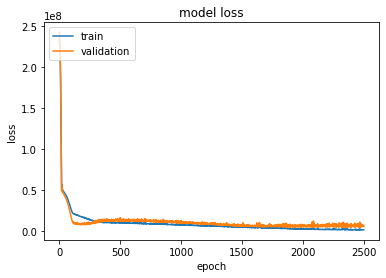

In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
ynew= model.predict(x_test)

In [30]:
error = mean_absolute_error(y_test, ynew)
print('Test MAE: %.3f' % error)

Test MAE: 2753.031
